Importing libraries

In [51]:
import numpy as np
import sympy as sp
import os
from queue import PriorityQueue
import matplotlib.pyplot as mp

Note: workspace is a rectangle of width b = 400 mm and height h = 250 mm

Variables:
C2C
C2G
closed_list
open _list
initial_node
goal_node
obstacle_space usign matrix and geometric equations
action_set --> N(1),S(1), E(1), W(1), NE(1.5), NW, SE, SW



Creating the workspace with all default values at once

In [58]:
#node size ratio (unit/node)
def map():
    global x_size, y_size, map_def, Rat
    Rat = 1
    x_size = int(400/Rat) #x and y  as per gloabl coordinate system and not matrix
    y_size = int(250/Rat)
    map_def = np.zeros((y_size,x_size,12))
    map_def[:,:,:] = -2

In [59]:
map()

Common obstacle code

In [60]:
def obs_run():
    global x_c, y_c, x_nc, y_nc, x_t1, y_t1, x_t1_nc, y_t1_nc, x_t2_nc, y_t2_nc, x_t2, y_t2, allp_map, map_obs4, x_h, y_h, x_h_nc, y_h_nc
    x_c = []
    y_c = []
    x_nc = []
    y_nc = []
    y_centre = int((249 - 65)/Rat)
    x_centre = int((399 - 100)/Rat)
    radius_c = int(55/Rat) #radius of cicle including clearance
    radius = int(40/Rat)
    map_obs1 = np.copy(map_def) # a deep copy #chnage this to map_obs1
    y1 = sp.symbols('y1')
    x1 = sp.symbols('x1')
    y2 = sp.symbols('y2')
    x2 = sp.symbols('x2')
    y3 = sp.symbols('y3')
    x3 = sp.symbols('x3')
    y4 = sp.symbols('y4')
    x4 = sp.symbols('x4')
    y5 = sp.symbols('y5')
    x5 = sp.symbols('x5')
#equations of line for the triangular obstacle space (NEEEDS TO BE UPDATED)
    e1 = y1 - (-5/54)*x1 - 187.87
    # e1 = e1/Rat
    e2 = y2 - (-85/69)*x2 - (15681/69) +18 #222.7
    # e2 = e2/Rat
    e2_nc = y2 - (-85/69)*x2 - 15681/69 #15681/69
    # e2_nc = e2_nc/Rat
    e3 = y3 - (-16/5)*x3 - (2169/5) -25 #543.25
    # e3 = e3/Rat
    e3_nc = y3 - (-16/5)*x3 - 2169/5
    # e3_nc = e3_nc/Rat
    e4 = y4 - (6/7)*x4 - (779/7) + 15
    # e4 = e4/Rat
    e4_nc = y4 - (6/7)*x4 - 779/7
    # e4_nc = e4_nc/Rat
    e5 = y5 - (25/79)*x5 - (13661/79) -15
    # e5 = e5/Rat
    e5_nc = y5 - (25/79)*x5 - 13661/79
    # e5_nc = e5_nc/Rat
    x_t1 = []
    y_t1 = []
    x_t2 = []
    y_t2 = []
    x_t1_nc = []
    y_t1_nc = []
    x_t2_nc = []
    y_t2_nc = []

    y6 = sp.symbols('y6')
    x6 = sp.symbols('x6')
    y7 = sp.symbols('y7')
    x7 = sp.symbols('x7')
    y8 = sp.symbols('y8')
    x8 = sp.symbols('x8')
    y9 = sp.symbols('y9')
    x9 = sp.symbols('x9')
    x10 = sp.symbols('x10')
    x11 = sp.symbols('x11')

    e6 = y6 - (5/8)*x6 + 81
    e6_nc = y6 - (4/7)*x6 + 380/7
    e10 = x10 - 249
    e10_nc = x10 - 234
    e7 = y7 + (5/8)*x7 - 281
    e7_nc = y7 + (4/7)*x7 - 1780/7
    e8 = y8 - (5/8)*x8 - 31
    e8_nc = y8 - (4/7)*x8 - 180/7
    e11 = x11 - 150
    e11_nc = x11 - 164
    e9 = y9 + (5/8)*x9 - 169
    e9_nc = y9 + (4/7)*x9 - 1220/7
    x_h = []
    y_h = []
    x_h_nc = []
    y_h_nc = []

    for x in range(int(360/Rat)):
        for y in range(int(30/Rat), int(255/Rat)):
            if (np.sqrt((x-x_centre)**2 + (y-y_centre)**2)) < radius_c: #circle
                map_obs4[y, x,:] = -1 #obstacle space updated as -1
                x_c.append(x) #to be used for plotting
                y_c.append(y)
            if (np.sqrt((x-x_centre)**2 + (y-y_centre)**2)) < radius:
                x_nc.append(x) #list of obstacle without clearance
                y_nc.append(y)
            #triangle
            if e1.subs([(x1,x),(y1,y)])<=0 and e2.subs([(x2,x),(y2,y)])>=0 and e3.subs([(x3,x),(y3,y)])<=0 :
                map_obs4[y,x,:] = -1
                x_t1.append(x)
                y_t1.append(y)
                allp_map.append([x,y])
            if e1.subs([(x1,x),(y1,y)])<=0 and e2_nc.subs([(x2,x),(y2,y)])>=0 and e3_nc.subs([(x3,x),(y3,y)])<=0 :
                x_t1_nc.append(x)
                y_t1_nc.append(y)
            if e1.subs([(x1,x),(y1,y)])>=0 and e4.subs([(x4,x),(y4,y)])>=0 and e5.subs([(x5,x),(y5,y)])<=0:
                map_obs4[y,x,:] = -1
                x_t2.append(x)
                y_t2.append(y)
                allp_map.append([x,y])
            if e1.subs([(x1,x),(y1,y)])>=0 and e4_nc.subs([(x4,x),(y4,y)])>=0 and e5_nc.subs([(x5,x),(y5,y)])<=0:
                x_t2_nc.append(x)
                y_t2_nc.append(y)

            #hexa
            if e6.subs([(x6,x),(y6,y)])>=0 and e7.subs([(x7,x),(y7,y)])<=0 and e8.subs([(x8,x),(y8,y)])<=0 and e9.subs([(x9,x),(y9,y)])>=0 and e10.subs([(x10,x)])<=0 and e11.subs([(x11,x)])>=0:
                map_obs4[y,x,:] = -1
                x_h.append(x)
                y_h.append(y)
                allp_map.append([x,y])
            if e6_nc.subs([(x6,x),(y6,y)])>=0 and e7_nc.subs([(x7,x),(y7,y)])<=0 and e8_nc.subs([(x8,x),(y8,y)])<=0 and e9_nc.subs([(x9,x),(y9,y)])>=0 and e10_nc.subs([(x10,x)])<=0 and e11_nc.subs([(x11,x)])>=0:
                x_h_nc.append(x)
                y_h_nc.append(y)
            

Circle

In [61]:
#x is column and y is row for the matrix
def circle_obs():
    global x_c, y_c, x_nc, y_nc, map_obs1, allp_map
    allp_map = []
    x_c = []
    y_c = []
    x_nc = []
    y_nc = []
    y_centre = int((249 - 65)/Rat)
    x_centre = int((399 - 100)/Rat)
    radius_c = int(55/Rat) #radius of cicle including clearance
    radius = int(40/Rat)
    map_obs1 = np.copy(map_def) # a deep copy #chnage this to map_obs1
    for x in range(int(240*Rat),int(360/Rat)):
        for y in range(int(120*Rat), int(240/Rat)):
            if (np.sqrt((x-x_centre)**2 + (y-y_centre)**2)) < radius_c:
                map_obs1[y, x,:] = -1 #obstacle space updated as -1
                x_c.append(x) #to be used for plotting
                y_c.append(y)
                allp_map.append([x,y]) #to be used for visualisation on pygame
            if (np.sqrt((x-x_centre)**2 + (y-y_centre)**2)) < radius:
                x_nc.append(x) #list of obstacle without clearance
                y_nc.append(y)


In [62]:
circle_obs()

Triangles

In [65]:
def triang_obs():
    global x_t1, y_t1, x_t1_nc, y_t1_nc, map_obs2, x_t2_nc, y_t2_nc, x_t2, y_t2, allp_map
    Rat = 1
    y1 = sp.symbols('y1')
    x1 = sp.symbols('x1')
    y2 = sp.symbols('y2')
    x2 = sp.symbols('x2')
    y3 = sp.symbols('y3')
    x3 = sp.symbols('x3')
    y4 = sp.symbols('y4')
    x4 = sp.symbols('x4')
    y5 = sp.symbols('y5')
    x5 = sp.symbols('x5')
#equations of line for the triangular obstacle space (NEEEDS TO BE UPDATED)
    e1 = y1 - (-5/54)*x1 - 187.87/Rat
    # e1 = e1/Rat
    e2 = y2 - (-85/69)*x2 - ((15681/69) +18)/Rat #222.7
    # e2 = e2/Rat
    e2_nc = y2 - (-85/69)*x2 - (15681/69)/Rat #15681/69
    # e2_nc = e2_nc/Rat
    e3 = y3 - (-16/5)*x3 - ((2169/5) -25)/Rat #543.25
    # e3 = e3/Rat
    e3_nc = y3 - (-16/5)*x3 - (2169/5)/Rat
    # e3_nc = e3_nc/Rat
    e4 = y4 - (6/7)*x4 - ((779/7) + 15)/Rat
    # e4 = e4/Rat
    e4_nc = y4 - (6/7)*x4 - (779/7)/Rat
    # e4_nc = e4_nc/Rat
    e5 = y5 - (25/79)*x5 - ((13661/79) -15)/Rat
    # e5 = e5/Rat
    e5_nc = y5 - (25/79)*x5 - (13661/79)/Rat
    # e5_nc = e5_nc/Rat
    x_t1 = []
    y_t1 = []
    x_t2 = []
    y_t2 = []
    x_t1_nc = []
    y_t1_nc = []
    x_t2_nc = []
    y_t2_nc = []
    map_obs2 = np.copy(map_obs1)
    for x in range(int(170/Rat)):
        for y in range(int(40*Rat),int(240/Rat)):
            if e1.subs([(x1,x),(y1,y)])<=0 and e2.subs([(x2,x),(y2,y)])>=0 and e3.subs([(x3,x),(y3,y)])<=0 :
                map_obs2[y,x,:] = -1
                x_t1.append(x)
                y_t1.append(y)
                allp_map.append([x,y])
            if e1.subs([(x1,x),(y1,y)])<=0 and e2_nc.subs([(x2,x),(y2,y)])>=0 and e3_nc.subs([(x3,x),(y3,y)])<=0 :
                x_t1_nc.append(x)
                y_t1_nc.append(y)
            if e1.subs([(x1,x),(y1,y)])>=0 and e4.subs([(x4,x),(y4,y)])>=0 and e5.subs([(x5,x),(y5,y)])<=0:
                map_obs2[y,x,:] = -1
                x_t2.append(x)
                y_t2.append(y)
                allp_map.append([x,y])
            if e1.subs([(x1,x),(y1,y)])>=0 and e4_nc.subs([(x4,x),(y4,y)])>=0 and e5_nc.subs([(x5,x),(y5,y)])<=0:
                x_t2_nc.append(x)
                y_t2_nc.append(y)


In [66]:
triang_obs()

Hexagon

In [67]:
def hex_obs():
    global map_obs4, x_h, y_h, x_h_nc, y_h_nc, allp_map
    y6 = sp.symbols('y6')
    x6 = sp.symbols('x6')
    y7 = sp.symbols('y7')
    x7 = sp.symbols('x7')
    y8 = sp.symbols('y8')
    x8 = sp.symbols('x8')
    y9 = sp.symbols('y9')
    x9 = sp.symbols('x9')
    x10 = sp.symbols('x10')
    x11 = sp.symbols('x11')

    e6 = y6 - (5/8)*x6 + 81/Rat
    e6_nc = y6 - (4/7)*x6 + (380/7)/Rat
    e10 = x10 - 249/Rat
    e10_nc = x10 - 234/Rat
    e7 = y7 + (5/8)*x7 - 281/Rat
    e7_nc = y7 + (4/7)*x7 - 1780/7/Rat
    e8 = y8 - (5/8)*x8 - 31/Rat
    e8_nc = y8 - (4/7)*x8 - (180/7)/Rat
    e11 = x11 - 150*Rat
    e11_nc = x11 - 164*Rat
    e9 = y9 + (5/8)*x9 - 169*Rat
    e9_nc = y9 + (4/7)*x9 - (1220/7)/Rat
    x_h = []
    y_h = []
    x_h_nc = []
    y_h_nc = []
    map_obs4 = np.copy(map_obs2)
    for x in range(int(148/Rat), int(252/Rat)):
        for y in range(int(30/Rat),int(165/Rat)):
            if e6.subs([(x6,x),(y6,y)])>=0 and e7.subs([(x7,x),(y7,y)])<=0 and e8.subs([(x8,x),(y8,y)])<=0 and e9.subs([(x9,x),(y9,y)])>=0 and e10.subs([(x10,x)])<=0 and e11.subs([(x11,x)])>=0:
                map_obs4[y,x,:] = -1
                x_h.append(x)
                y_h.append(y)
                allp_map.append([x,y])
            if e6_nc.subs([(x6,x),(y6,y)])>=0 and e7_nc.subs([(x7,x),(y7,y)])<=0 and e8_nc.subs([(x8,x),(y8,y)])<=0 and e9_nc.subs([(x9,x),(y9,y)])>=0 and e10_nc.subs([(x10,x)])<=0 and e11_nc.subs([(x11,x)])>=0:
                x_h_nc.append(x)
                y_h_nc.append(y)


In [68]:
hex_obs()

<function matplotlib.pyplot.show(close=None, block=None)>

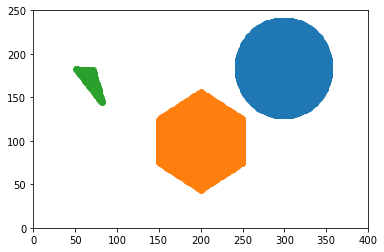

In [70]:
import matplotlib.pyplot as plt
plt.scatter(x_c, y_c)
plt.scatter(x_h, y_h)
plt.scatter(x_t1, y_t1)
plt.scatter(x_t2, y_t2)
plt.axis([0, 400, 0, 250])
plt.show

The main algorithm

Data structure

In [71]:
class Node:
    def __init__(self, node_id, node_loc, parent_id, c2c , c2g):
        self.parent_id = parent_id #
        self.node_id = node_id #unique node id for each node
        self.node_loc = node_loc ## [y,x,angle]
        self.c2c= round(c2c,0)
        self.c2g=round(c2g,2)
        self.total_cost = round(c2c+c2g,2)

In [72]:
def pop(Closed_list, Open_list, All_list):
    dat = Open_list.get()
    #dat[0] is c2c+c2g, dat[1] is Node_id--> starts from 1, list starts from 0 
    Closed_list.append(All_list[dat[1]-1]) #indexing the node from the all_list  
    ##check for goal
    print('closed list updated')
    if All_list[dat[1]-1].node_loc in goal_list:
        print('this will be done at', All_list[dat[1]-1].node_loc )
        return "Goal found"
    return All_list[dat[1]-1]


Cost Dictionary

In [73]:
cost_direction = {'S': 1, 'D': 1}

Parameter update

In [74]:
def param(All_list, Open_list, map_obs4, cost_dir, n_c, n_d,ang, node):
     id = All_list[-1].node_id + 1
     map_obs4[n_c,n_d,int(ang/30)] = id  ## id is updated in map
     c2_g=c2g([n_c,n_d],goal_location[0:2])
     c2c=node.c2c+cost_dir
     cost = c2c+c2_g  #cost_dir is a dictionary
     parent = node.node_id
     loc = [n_c, n_d, int(ang/30)]
     # print('node at id', id, 'cost is', cost, 'loc', loc)
     All_list.append(Node(id, loc, parent, c2c,c2_g)) ## node is created
     tup_new = [cost, id]
     Open_list.put(tup_new) ## list of [cost, id] ###gives the [cost,id] in priority queue open list

List cost update function

All cost needs to be rounded off to 2 due to euclidean distance

In [75]:
def cost_update(nod, n_c ,n_d, ang, All_list,  Closed_list, Open_list, map_obs4, cost_dir):
     index = int(map_obs4[n_c, n_d, int(ang/30)])
     if round((nod.c2c + cost_dir),1)< round(All_list[index-1].c2c,1): #since index/node_id is starting from 1
            All_list[index-1].c2c = round((nod.c2c + cost_dir),1)
            All_list[index-1].parent_id = nod.node_id
            # print('updated cost of node', index, 'is', All_list[index-1].cost)
            for i in Closed_list:
                if i.node_id ==index:
                        i.c2c = round((nod.c2c + cost_dir),1)
                        i.parent_id = nod.node_id
            if Open_list.qsize() > 0:
                for j in Open_list.queue:
                    if j[1] ==index:
                            j[0] = round((nod.c2c + cost_dir),1)
                            # i.parent_id = nod.node_id  

Check if goal function

In [76]:
# def check_if_goal(goal_loc, A_list, go_cost):
#     # print('checking goal')
#     if goal_loc==A_list[-1].node_loc:
#         go_cost = A_list[-1].cost #updates the goal cost
#         print('goal cost is', go_cost)
#         return go_cost
#     else:
#         return None


In [78]:
def move_zero(node, All_list, Open_list, k):
    a,b, node_k =node.node_loc
    angle=node_k*30
    ang=(angle+k*30)%360
    c= a + (L*np.sin(ang*(np.pi/180)))/Rat #needs to be according to the matrix
    d= b + (L*np.cos(ang*(np.pi/180)))/Rat
    n_c, n_d=thres_round(c,d)
    print(n_c, n_d, ang)
    if (9/Rat)<=(n_c/Rat)<=(239/Rat) and (9/Rat)<=n_d<=(389/Rat): 
        if map_obs4[n_c,n_d,int(ang/30)]==-2:
            param(All_list, Open_list, map_obs4, cost_direction['S'], n_c, n_d, ang, node) 
            print('node created with id', All_list[-1].node_id)
            return print('node created at', All_list[-1].node_loc)
            
        elif map_obs4[n_c,n_d, int(ang/30)]==-1:
            print('Obstacle space')
            return None
        
        else:
            print('Node exists, checking cost...')
            cost_update(node, n_c ,n_d,ang, All_list,  Closed_list, Open_list, map_obs4, cost_direction['S'])  
            return None
    else:
        return None
     

In [79]:
def thres_round(c,d):
    # Rat=0.5
    n_c=np.round(c,0)
    n_d=np.round(d,0)

    return int(n_c),int(n_d)

In [80]:
def movement(node, All_list, Open_list):
    move_zero(node, All_list, Open_list,0)
    print('move 0')
    move_zero(node, All_list, Open_list,-1)
    print('move 1')
    move_zero(node, All_list, Open_list,-2)
    print('move 2')
    move_zero(node, All_list, Open_list,1)
    print('move 3')
    move_zero(node, All_list, Open_list,2)
    print('move 4')
    

considering a radius of 2 for now:

In [81]:
#passed input is as per the user
def goal_space(goal_x, goal_y, k):
    centre_x = goal_x
    centre_y = goal_y
    goal_list = []
    for i in range(goal_x-3,goal_x+3):
        for j in range(goal_y-3, goal_y+3):
            if (i-centre_x)**2 + (j-centre_y)**2<=4:
                goal_list.append([j,i,k])
    return goal_list 
    #output is as per the matrix

In [82]:
# def backtrack(A_list, x, y):
#     ind = int(map_obs4[goal_location[0], goal_location[1]])
#     x.append(A_list[ind-1].node_loc[0])
#     y.append(A_list[ind-1].node_loc[1])
#     id = A_list[ind-1].parent_id
#     while(id>0):
#         x.append(A_list[id-1].node_loc[0])
#         y.append(A_list[id-1].node_loc[1])
#         id = A_list[id - 1].parent_id


In [83]:
def c2g(initial, final):
    
    return np.round(np.linalg.norm(np.array(initial)-np.array(final)),2)

x,y-world coordinate
x,y,k--- angle in terms of degrees
k --- 0,11 
angle =k*30

In [91]:
def initial():
    global All_list, Closed_list, goal_location, Open_list, allp_map, goal_list
    allp_map = []
    All_list = []
    Closed_list = []
    goal_list = []
    first_node_id = 1
    start_cords_x = 10##int(input("please enter the starting x coordinate: "))
    start_cords_y = 10##int(input("please enter the starting y coordinate: "))
    start_angle=0 ##int(input("please enter the starting angle"))
    start_k=int(start_angle/30)
    # if start_cords_x<1 or start_cords_x>400 or start_cords_y<1 or start_cords_y>400:
    #     print("Either wrong input or the start node is in obstacle space")
    #     exit(0)
    # else:
    #     node_loc = [start_cords_y-1, start_cords_x-1]
    start_location = [(start_cords_y-1)/Rat, (start_cords_x-1)/Rat, start_k]
    goal_cords_x = 141##int(input("please enter the goal x coordinate: "))
    goal_cords_y = 101 ##int(input("please enter the goal y coordinate: "))
    goal_angle=60 ##int(input("please enter the goal angle"))
    goal_k=int(goal_angle/30)
    # if goal_cords_x<1 or goal_cords_x>400 or goal_cords_y<1 or goal_cords_y>400:
    #     print("Either wrong input or the goal node is in obstacle space")
    #     exit(0)
    # else:
    #     goal_location = [goal_cords_y-1, goal_cords_x-1] ### change
    goal_location = [(goal_cords_y-1)/Rat, (goal_cords_x-1)/Rat,goal_k]
    goal_list = goal_space(goal_cords_x-1, goal_cords_y-1, goal_k)
    map()
    circle_obs()
    triang_obs()
    hex_obs()
    # if map_obs4[start_cords_y-1, start_cords_x-1]==-1 or map_obs4[goal_cords_y-1, goal_cords_x-1]==-1:
    #     print("start or goal node in obstacle space")
    #     exit(0)
    # else:
    map_obs4[start_cords_y-1, start_cords_x-1, start_k] = first_node_id
    first_parent_id = 0
    initial_c2g=c2g(start_location[0:2], goal_location[0:2])
    first_cost = 0+initial_c2g
    All_list.append(Node(first_node_id, start_location, first_parent_id,0,initial_c2g))
    tup = [first_cost, first_node_id] # just the cost and node id, access the node using all visited and node id
    Open_list = PriorityQueue()
    Open_list.put(tup)

In [92]:
Rat = 1 #unit per node
L=1 #can be from 1 to 10
initial()

In [93]:
goal_list

[[100, 138, 2],
 [99, 139, 2],
 [100, 139, 2],
 [101, 139, 2],
 [98, 140, 2],
 [99, 140, 2],
 [100, 140, 2],
 [101, 140, 2],
 [102, 140, 2],
 [99, 141, 2],
 [100, 141, 2],
 [101, 141, 2],
 [100, 142, 2]]

<function matplotlib.pyplot.show(close=None, block=None)>

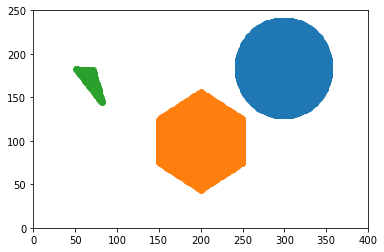

In [94]:
import matplotlib.pyplot as plt
plt.scatter(x_c, y_c)
plt.scatter(x_h, y_h)
plt.scatter(x_t1, y_t1)
plt.scatter(x_t2, y_t2)
plt.axis([0, 400, 0, 250])
plt.show


In [95]:
map_obs4[100,140,:]

array([-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.])

In [96]:
np.shape(np.where(map_obs4==-1))

(3, 215280)

Take the input from user

In [97]:

##goal_cost = np.inf
while(1):
    if (Open_list.qsize()>0):
        

        print('inside while')
        node =pop(Closed_list, Open_list, All_list)
        print('all list length is', len(All_list))
        if type(node) == str:
            print('done')
            break
        else:
            print('popped')

        # print('closed list', len(Closed_list))
        # print('openlist', len(Open_list))
            movement(node, All_list, Open_list)
            # print('check is', check)
        #     if(check!=None):
        #         print('mila na')
        #         goal_cost = All_list[int(map_obs4[goal_location[0],goal_location[1]]-1)].cost

        #         print('goal cost is', goal_cost)
        # else:
        #     print('cost exceeded')
        #     break
    
    else:
        print('open list empty')
        break
    
       


inside while
closed list updated
all list length is 1
popped
9 10 0
node created with id 2
node created at [9, 10, 0]
move 0
8 10 330
move 1
8 10 300
move 2
10 10 30
node created with id 3
node created at [10, 10, 1]
move 3
10 10 60
node created with id 4
node created at [10, 10, 2]
move 4
inside while
closed list updated
all list length is 4
popped
10 11 30
node created with id 5
node created at [10, 11, 1]
move 0
10 11 0
node created with id 6
node created at [10, 11, 0]
move 1
10 11 330
node created with id 7
node created at [10, 11, 11]
move 2
11 10 60
node created with id 8
node created at [11, 10, 2]
move 3
11 10 90
node created with id 9
node created at [11, 10, 3]
move 4
inside while
closed list updated
all list length is 9
popped
11 10 60
Node exists, checking cost...
move 0
10 11 30
Node exists, checking cost...
move 1
10 11 0
Node exists, checking cost...
move 2
11 10 90
Node exists, checking cost...
move 3
11 10 120
node created with id 10
node created at [11, 10, 4]
move 4

In [ ]:
All_list[-1].node_loc

In [ ]:
goal_list

In [ ]:
Open_list.qsize()

In [ ]:
len(All_list)

In [ ]:
len(allp_map)

Backtracking

In [ ]:
# if (map_obs4[goal_location[0], goal_location[1]]!=-1 and map_obs4[goal_location[0], goal_location[1]]!=-2 ):
#     x_a = []
#     y_a = []
#     backtrack(All_list, x_a, y_a)
#     mp.show()
#     mp.axis([0, 400, 0, 250])
#     mp.plot(y_a,x_a)
#     mp.plot(x_nc, y_nc)
#     mp.plot(x_t1_nc,y_t1_nc)
#     mp.plot(x_t2_nc,y_t2_nc)
#     mp.plot(x_h_nc,y_h_nc)
# else:
#     print('cannot be back tracked')